In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gdal
import os
import cv2

D:\Python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\Python37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# 读取数据
def readimg(name):
    img = gdal.Open(os.path.join(filepath, name))
    img_b = img.GetRasterBand(1).ReadAsArray()
    img_g = img.GetRasterBand(2).ReadAsArray()
    img_r = img.GetRasterBand(3).ReadAsArray()
    img_n = img.GetRasterBand(4).ReadAsArray()
    img = np.dstack((img_b,img_g,img_r,img_n))
    print(img.shape)
    width=img.shape[0]
    height=img.shape[1]
    img.resize((img.shape[0]*img.shape[1],4))
    return img
def writeimg(name):
    img = gdal.Open(os.path.join(filepath, name))
    img_b = img.GetRasterBand(1).ReadAsArray()
    img_g = img.GetRasterBand(2).ReadAsArray()
    img_r = img.GetRasterBand(3).ReadAsArray()
    img = np.dstack((img_b,img_g,img_r))
    cv2.imwrite(r"E:\project\images\researchImage\images\\"+name,img)

In [32]:
# 数据分布可视化
def plotDist(data,name='',range=None):
    plt.hist(data[:,2], bins=256, facecolor='r', edgecolor='r', alpha=0.2)#bins=256
    plt.hist(data[:,1], bins=256, facecolor='g', edgecolor='g', alpha=0.2)
    plt.hist(data[:,0], bins=256, facecolor='b', edgecolor='b', alpha=0.2)
    plt.title(name+" distribution")
    plt.savefig(r"E:\project\imgs\\"+name+"distribution.png",dpi=400)
    plt.show()
# maxmin
def normMaxMin(data):
    new=np.zeros_like(data,dtype=np.float64)
    dmax=data.max()
    dmin=data.min()
    for i in range(3):
        new[:,i]=(data[:,i])*255/(dmax-dmin)+dmin
    new=np.uint8(new+0.5)
    return new

In [4]:
filepath = r"E:\project\images\researchImage\region"
data07 = readimg("070727.tif")
data10 = readimg("100818.tif")
data11 = readimg("110608.tif")
data13 = readimg("130916.tif")
data15 = readimg("150729.tif")
data17 = readimg("170823.tif")
data18 = readimg("181029.tif")

(5415, 5451, 4)
(5415, 5451, 4)
(5415, 5451, 4)
(5415, 5451, 4)
(5415, 5451, 4)
(5415, 5451, 4)
(5415, 5451, 4)


In [9]:
data00 = readimg("000326.tif")
data04 = readimg("040121.tif")
data09 = readimg("090618.tif")

(1342, 1358, 4)
(1678, 1698, 4)
(2237, 2264, 4)


In [65]:
# write
filepath = r"E:\project\images\researchImage\region"
writeimg("070727.tif")
writeimg("100818.tif")
writeimg("110608.tif")
writeimg("130916.tif")
writeimg("150729.tif")
writeimg("170823.tif")
writeimg("181029.tif")

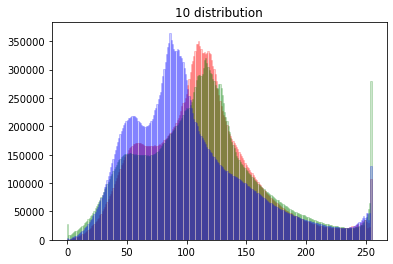

In [57]:
plotDist(data07,'07')
plotDist(data10,'10')
plotDist(data11,'11')
plotDist(data13,'13')
plotDist(data15,'15')
plotDist(data17,'17')
plotDist(data18,'18')

In [5]:
# Compute MMD (maximum mean discrepancy) using numpy and scikit-learn.
from sklearn import metrics


def mmd_linear(X, Y):
    """MMD using linear kernel (i.e., k(x,y) = <x,y>)
    Note that this is not the original linear MMD, only the reformulated and faster version.
    The original version is:
        def mmd_linear(X, Y):
            XX = np.dot(X, X.T)
            YY = np.dot(Y, Y.T)
            XY = np.dot(X, Y.T)
            return XX.mean() + YY.mean() - 2 * XY.mean()
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Returns:
        [scalar] -- [MMD value]
    """
    delta = X.mean(0) - Y.mean(0)
    return delta.dot(delta.T)


def mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()


def mmd_poly(X, Y, degree=2, gamma=1, coef0=0):
    """MMD using polynomial kernel (i.e., k(x,y) = (gamma <X, Y> + coef0)^degree)
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        degree {int} -- [degree] (default: {2})
        gamma {int} -- [gamma] (default: {1})
        coef0 {int} -- [constant item] (default: {0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.polynomial_kernel(X, X, degree, gamma, coef0)
    YY = metrics.pairwise.polynomial_kernel(Y, Y, degree, gamma, coef0)
    XY = metrics.pairwise.polynomial_kernel(X, Y, degree, gamma, coef0)
    return XX.mean() + YY.mean() - 2 * XY.mean()





In [13]:
print("07 and 10 MMD:",mmd_linear(data07[:,:3],data10[:,:3]))
print("07 and 11 MMD:",mmd_linear(data07[:,:3],data11[:,:3]))
print("07 and 13 MMD:",mmd_linear(data07[:,:3],data13[:,:3]))
print("07 and 15 MMD:",mmd_linear(data07[:,:3],data15[:,:3]))
print("07 and 17 MMD:",mmd_linear(data07[:,:3],data17[:,:3]))
print("07 and 18 MMD:",mmd_linear(data07[:,:3],data18[:,:3]))


07 and 10 MMD: 1695.1327970070563
07 and 11 MMD: 194.06465656640398
07 and 13 MMD: 528.0280170570252
07 and 15 MMD: 1180.9084384248574
07 and 17 MMD: 3745.9079062988467
07 and 18 MMD: 539.4345226824174


In [14]:
print("07 and 00 MMD:",mmd_linear(data07[:,:3],data00[:,:3]))
print("07 and 00 MMD:",mmd_linear(data07[:,:3],data04[:,:3]))
print("07 and 00 MMD:",mmd_linear(data07[:,:3],data09[:,:3]))

07 and 00 MMD: 356306.6482617847
07 and 00 MMD: 375876.29888170277
07 and 00 MMD: 77185.06586070413


In [15]:
print("04 and 00 MMD:",mmd_linear(data04[:,:3],data00[:,:3]))
print("09 and 00 MMD:",mmd_linear(data09[:,:3],data00[:,:3]))
print("04 and 09 MMD:",mmd_linear(data04[:,:3],data09[:,:3]))

04 and 00 MMD: 850.5558815039402
09 and 00 MMD: 110264.52253402004
04 and 09 MMD: 118280.22097740899


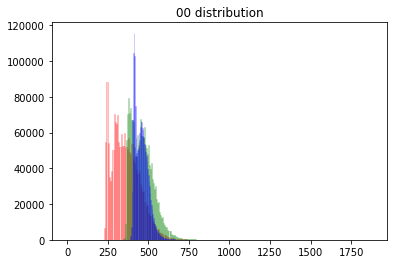

In [33]:
plotDist(data00,'00',[200,900])

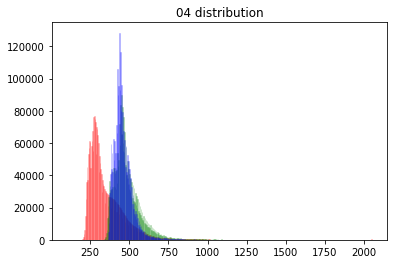

In [30]:
plotDist(data04,'04')

In [ ]:
plotDist(data09,'09')

[[5 1 0]
 [0 2 8]
 [8 4 3]]
